# Network Optimization using PuLP (Linear programming)

#### Problem statement

Supplier and demand structure depicted in the graph below, where demands from the customers (end users) can only be catered thru suppliers. 

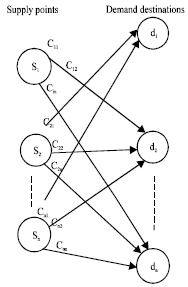
<center>figure 1: The network representation of a general transportation problem</center>

##### Objectives - 
Which supplier should be operating ?<br>
How to allocate the demand to suppliers?

#### Mathematical formulation
Since there can be various suppliers and customers (end users), we need to use the indices to represent them.<br>
- Suppliers can be represented as Si where 'i' can vary to denote supplier 1,2,3....and so on<br>
- Customers can be represented as Cj where 'j' can vary to denote customer 1,2,3....and so on

##### Parameters - 
dj = jth customer demand<br>
cij = Unit cost of transportation from ith supplier to jth customer<br>
fi = Fixed cost of opening supplier i<br>
CAPi = Capacity of ith supplier 

#### Decision Variables (Continuous/Discrete)
Qij = quantity of products transported from supplier i to customer j (Continuous) <br> 
Oi = if ith supplier is open 1, else 0 (Discrete)

#### Objective function:  Minimize ΣQij*cij +  Σfi*Oi

##### Subject to: 
ΣQij = dj <br>
ΣQij <= CAPi*Oi<br>
Oi ∈ {0,1}

#### Solution - 

Python interface for optimization - Use PuLP (for linear programming models) to create decision variables and formulate the problem statement <br>
Popular optimization solvers - CPLEX, Gurobi, GLPK, LINDO and Lingo etc.

In [1]:
# ! pip install pulp

In [2]:
from pulp import *

In [3]:
# create a list of variables which could be continuous/discrete in nature
supplierNames = ['A','B','C','D'] # total 4 facilities
supplierPoints = [0,1,2,3] 
fixedCost = [550000,710000,610000,650000]
capacity = [40,40,40,40]
productionCost = [12000,10000,13000,13000]

demandPoints = [0,1,2,3,4,5,6,7,8] # total 9 customers/end-users/demands
demand = [12,8,14,16,7,15,17,8,9]
distances = [[120,140,0,270,365,180,310,680,480],
             [340,515,365,320,0,175,290,660,120],
             [130,320,180,250,175,0,290,590,310],
             [400,420,310,30,290,290,0,370,210]
            ]

In [4]:
# initialize the problem variable 
prb = LpProblem('minimize_cost',LpMinimize)

In [5]:
# Is Facility open (funtioning)
openFacility = LpVariable.dicts('openFacility',supplierPoints,0,1,LpBinary)

In [6]:
qtyShip = LpVariable.dicts('quantity',[(i,j) for i in openFacility for j in demandPoints],0,100)

In [7]:
# Add objective funtion to the prb
prb += lpSum([fixedCost[i]*openFacility[i] for i in supplierPoints]) + \
        lpSum([distances[i][j]*qtyShip[(i,j)] for i in supplierPoints for j in demandPoints])

In [8]:
# Adding constraints to the problem
# Demand side constraint
for j in demandPoints:
    prb += lpSum(qtyShip[(i,j)] for i in supplierPoints) == demand[j]
    
# Supplier side constraint
for i in supplierPoints:
    prb += lpSum(qtyShip[(i,j)] for j in demandPoints) <= (capacity[i]*openFacility[i])

In [9]:
# lets write the problem data into lp file 
prb.writeLP('minimize_cost.lp')

[openFacility_0,
 openFacility_1,
 openFacility_2,
 openFacility_3,
 quantity_(0,_0),
 quantity_(0,_1),
 quantity_(0,_2),
 quantity_(0,_3),
 quantity_(0,_4),
 quantity_(0,_5),
 quantity_(0,_6),
 quantity_(0,_7),
 quantity_(0,_8),
 quantity_(1,_0),
 quantity_(1,_1),
 quantity_(1,_2),
 quantity_(1,_3),
 quantity_(1,_4),
 quantity_(1,_5),
 quantity_(1,_6),
 quantity_(1,_7),
 quantity_(1,_8),
 quantity_(2,_0),
 quantity_(2,_1),
 quantity_(2,_2),
 quantity_(2,_3),
 quantity_(2,_4),
 quantity_(2,_5),
 quantity_(2,_6),
 quantity_(2,_7),
 quantity_(2,_8),
 quantity_(3,_0),
 quantity_(3,_1),
 quantity_(3,_2),
 quantity_(3,_3),
 quantity_(3,_4),
 quantity_(3,_5),
 quantity_(3,_6),
 quantity_(3,_7),
 quantity_(3,_8)]

In [10]:
# lets solve this problem using PuLP solver
prb.solve()

1

In [11]:
print(f'Status: {LpStatus[prb.status]}')
for point in supplierPoints:
    print(f'supplierNames[point] is {"open" if openFacility[point].varValue==1.0 else "closed"}')
for var in prb.variables():
    if var.varValue!=0:
        print(f'{var.name} = {var.varValue}')
# Minimized cost
print(f'The optimized minimum objective function value is {value(prb.objective)}')

Status: Optimal
supplierNames[point] is open
supplierNames[point] is closed
supplierNames[point] is open
supplierNames[point] is open
openFacility_0 = 1.0
openFacility_2 = 1.0
openFacility_3 = 1.0
quantity_(0,_0) = 12.0
quantity_(0,_1) = 8.0
quantity_(0,_2) = 14.0
quantity_(2,_4) = 7.0
quantity_(2,_5) = 15.0
quantity_(2,_7) = 1.0
quantity_(2,_8) = 9.0
quantity_(3,_3) = 16.0
quantity_(3,_6) = 17.0
quantity_(3,_7) = 7.0
The optimized minimum objective function value is 1820235.0


###### Due to scalability of this model, we can add more decision variables, constraints etc. 1000's of them and can be generalized to any type of linear programming problems. 